In [2]:
import ROOT as r
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [3]:
def getData(hist):
    nX = hist.GetNbinsX()
    nY = hist.GetNbinsY()
    
    data = np.empty((nX, nY))
    for i in range(nX):
        for j in range(nY):
            data[i,j] = hist.GetBinContent(i+1,j+1)
            
    xbins = np.empty(nX)
    for i in range(nX):
        xbins[i] = hist.GetXaxis().GetBinCenter(i+1)

    ybins = np.empty(nY)
    for j in range(nY):
        ybins[j] = hist.GetYaxis().GetBinCenter(j+1)
            
    return data, xbins, ybins, nX, nY

In [4]:
tracker_path = '/data2/newg2/Tracker/Run1/'
file_name = 'trackRecoPlots_15923.root'   #  <------------------ change file number here
plot_path12 = 'Extrapolation/vertices/station12/h_vertexPosSpread'
plot_path18 = 'Extrapolation/vertices/station18/h_vertexPosSpread'

root_file = r.TFile(tracker_path+file_name, "READ")

hist12 = root_file.Get(plot_path12)
data12, xbins, ybins, nX, nY = getData(hist12)

hist18 = root_file.Get(plot_path18)
data18, _, _, Nx, Ny = getData(hist18)
#n = hist.GetEntries()

if nX != Nx: print "Stations have different bins in X!"
if nY != Ny: print "Stations have different bins in Y!"

In [8]:
print xbins - ybins

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [4]:
xdata12 = np.sum(data12,1)/np.max(np.sum(data12,1))
xdata18 = np.sum(data18,1)/np.max(np.sum(data18,1))
ydata12 = np.sum(data12,0)/np.max(np.sum(data12,0))
ydata18 = np.sum(data18,0)/np.max(np.sum(data18,0))

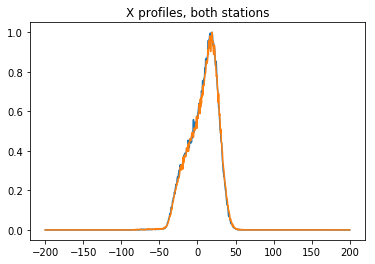

In [5]:
#x profile
plt.plot(xbins, xdata12)
plt.plot(xbins, xdata18)
plt.title("X profiles, both stations")
plt.show()

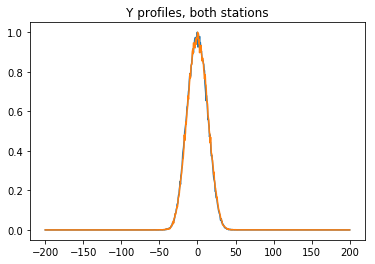

In [6]:
#y profile
plt.plot(ybins, ydata12)
plt.plot(ybins, ydata18)
plt.title("Y profiles, both stations")
plt.show()

In [7]:
def Gaussian(x, mu, sigma, A):
    return A*np.exp(-(x-mu)**2/(2*sigma**2))

def x_fit(x, m1, m2, m3, s1, s2, s3, A1, A2, A3):
    return Gaussian(x, m1, s1, A1) + Gaussian(x, m2, s2, A2) + Gaussian(x, m3, s3, A3)    

In [8]:
Xparams12, _ = curve_fit(x_fit, xbins, xdata12, p0=[-24, -2, 20, 8.3, 12.7, 9.9, 0.17, 0.5, 0.9])
Xparams18, _ = curve_fit(x_fit, xbins, xdata18, p0=[-24, -2, 20, 8.3, 12.7, 9.9, 0.17, 0.5, 0.9])

In [18]:
#sort by height of peak - A's
sort12 = np.argsort(Xparams12[6:9])
sort18 = np.argsort(Xparams18[6:9])

#variables: A1, m1 (highest peak), s1, (A1-A3)/A1=d
#a2 = (Xparams12[sort12[1]+6]/Xparams12[sort12[0]+6] + Xparams18[sort18[1]+6]/Xparams18[sort18[0]+6])/2
#a3 = (Xparams12[sort12[2]+6]/Xparams12[sort12[0]+6] + Xparams18[sort18[2]+6]/Xparams18[sort18[0]+6])/2
a2 = (Xparams12[sort12[1]+6]/Xparams12[sort12[2]+6] + Xparams18[sort18[1]+6]/Xparams18[sort18[2]+6])/2
s2 = (Xparams12[sort12[1]+3]/Xparams12[sort12[0]+3] + Xparams18[sort18[1]+3]/Xparams18[sort18[0]+3])/2
s3 = (Xparams12[sort12[2]+3]/Xparams12[sort12[0]+3] + Xparams18[sort18[2]+3]/Xparams18[sort18[0]+3])/2
d2 = (Xparams12[sort12[0]] + Xparams18[sort18[0]] - Xparams12[sort12[1]] - Xparams18[sort18[1]])/2
d3 = (Xparams12[sort12[0]] + Xparams18[sort18[0]] - Xparams12[sort12[2]] - Xparams18[sort18[2]])/2


def SumGaussian(x, mu, sigma, A, d):
    #return Gaussian(x, mu, sigma, A) + Gaussian(x, mu-d2, s2*sigma, A*a2) + Gaussian(x, mu-d, s3*sigma, A*a3)
    return Gaussian(x, mu, sigma, A) + Gaussian(x, mu-d2, s2*sigma, (1-d)*A*a2) + Gaussian(x, mu-d3, s3*sigma, A*(1-d))

Xresults12 = [Xparams12[sort12[0]], Xparams12[sort12[0]+3], Xparams12[sort12[0]+6], (Xparams12[sort12[0]+6]-Xparams12[sort12[2]+6])/Xparams12[sort12[0]+6]]
Xresults18 = [Xparams18[sort18[0]], Xparams18[sort18[0]+3], Xparams18[sort18[0]+6], (Xparams18[sort18[0]+6]-Xparams18[sort18[2]+6])/Xparams18[sort18[0]+6]]

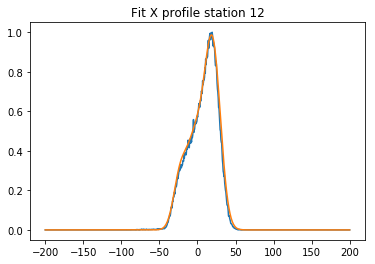

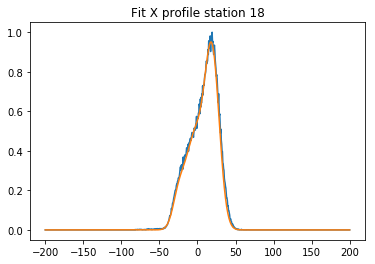

In [19]:
#x profile station 12
plt.plot(xbins, xdata12)
plt.plot(xbins, SumGaussian(xbins, Xresults12[0], Xresults12[1], Xresults12[2], Xresults12[3]))
plt.title("Fit X profile station 12")
plt.show()

#x profile station 18
plt.plot(xbins, xdata18)
plt.plot(xbins, SumGaussian(xbins, Xresults18[0], Xresults18[1], Xresults18[2], Xresults18[3]))
plt.title("Fit X profile station 18")
plt.show()

In [14]:
Yresults12, _ = curve_fit(Gaussian, ybins, ydata12)
Yresults18, _ = curve_fit(Gaussian, ybins, ydata18)

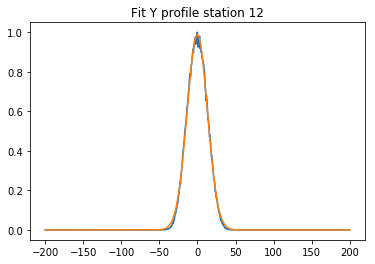

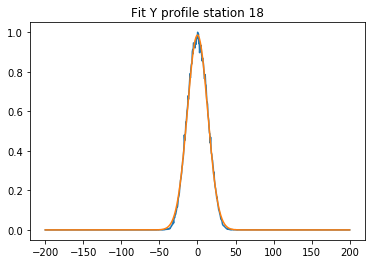

In [15]:
#y profile station 12
plt.plot(ybins, ydata12)
plt.plot(ybins, Gaussian(ybins, Yresults12[0], Yresults12[1], Yresults12[2]))
plt.title("Fit Y profile station 12")
plt.show()

#y profile station 18
plt.plot(ybins, ydata18)
plt.plot(ybins, Gaussian(ybins, Yresults18[0], Yresults18[1], Yresults18[2]))
plt.title("Fit Y profile station 18")
plt.show()

In [20]:
#results
print "\nN(x, mu, sigma) = exp(-1/2 * (x-mu)^2/sigma^2)"
print "\n-----X profiles-----"
print "\nFit equation: f(x) = A*N(x, m, s) + A*(1-d)*a2*N(x, m-d2, s*s2) + A*(1-d)*N(x, m-d3, s*s3)"
print "\nwith a2=", a2, ", d2=", d2, ", d3=", d3, ", s2=", s2, ", s3=", s3
print "\nStation 12\nm: ", Xresults12[0], "\ns: ", Xresults12[1], "\nd: ", Xresults12[3]
print "\nStation 18\nm: ", Xresults18[0], "\ns: ", Xresults18[1], "\nd: ", Xresults18[3]
print "\n-----Y profiles-----"
print "\nStation 12\nmu: ", Yresults12[0], "\nsigma: ", Yresults12[1]
print "\nStation 18\nmu: ", Yresults18[0], "\nsigma: ", Yresults18[1]


N(x, mu, sigma) = exp(-1/2 * (x-mu)^2/sigma^2)

-----X profiles-----

Fit equation: f(x) = A*N(x, m, s) + A*(1-d)*a2*N(x, m-d2, s*s2) + A*(1-d)*N(x, m-d3, s*s3)

with a2= 0.5423945528358879 , d2= -21.36797821058757 , d3= -44.314241300181465 , s2= 1.6310856922187589 , s3= 1.2495857964472854

Station 12
m:  -23.999242924668888 
s:  8.237195917085296 
d:  -3.5915100640591606

Station 18
m:  -24.995487218468327 
s:  7.602384552373678 
d:  -5.270823023504057

-----Y profiles-----

Station 12
mu:  -0.2783021370356765 
sigma:  13.391565263923404

Station 18
mu:  0.034546710920223725 
sigma:  13.412504965164922
